CREATING A COMBINED DATASET FROM WEATHER DATA (4 variables, hourly, years: 2016-2018)
hre are stations with a lot of NaN:s -> what to do with them


In [96]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read yeasr 2014 - 2018
temperatures = pd.read_csv('csv-b9a53105-dc7d-465f-8058-164e77a43067.csv')

# HelsinkiBikers_cleanDataset from GitHub') / Katariina
cyclists = pd.read_csv('https://raw.githubusercontent.com/srenoes/ShortCut-HSL-group-work/master/Katariina/HelsinkiBikers_cleanDataset.csv')

In [97]:
temperatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26305 entries, 0 to 26304
Data columns (total 9 columns):
Year                      26305 non-null int64
m                         26305 non-null int64
d                         26305 non-null int64
Time                      26305 non-null object
Time zone                 26305 non-null object
Snow depth (cm)           26221 non-null float64
Air temperature (degC)    26303 non-null float64
Wind direction (deg)      26070 non-null float64
Gust speed (m/s)          26077 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 1.8+ MB


In [98]:
cyclists = cyclists[cyclists.Date.str[0:4].isin(['2016','2017','2018'])]


In [99]:
cyclists.info()
# Note Auroransilta Kaivkatu, Käpylä, Viikintie

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26304 entries, 17520 to 43823
Data columns (total 23 columns):
Weekday                           26304 non-null object
Date                              26304 non-null object
Time                              26304 non-null object
Auroransilta                      10010 non-null float64
Etelaesplanadi                    26280 non-null float64
Huopalahti (station)              26304 non-null float64
Kaisaniemi/Elaintarhanlahti       26304 non-null float64
Kaivokatu                         10008 non-null float64
Kulosaari bridge south            26304 non-null float64
Kulosaaren silta po.              26304 non-null float64
Kuusisaarentie                    26304 non-null float64
Kapyla, Pohjoisbaana              11445 non-null float64
Lauttasaarin bridge south side    26304 non-null float64
Merikannontie                     26304 non-null float64
Munkkiniemi bridge south side     26304 non-null float64
Munkkiniemi bridge north side     2

In [100]:
# how many rows with NaN altogether?
sum([True for idx,row in cyclists.iterrows() if any(row.isnull())])
# so 1361 rows containing NaN somewhere
# wors cases: Viikintie, Lauttasaari, .....? To be taken away later

17656

In [101]:
cyclists.tail()

,Weekday,Date,Time,Auroransilta,Etelaesplanadi,Huopalahti (station),Kaisaniemi/Elaintarhanlahti,Kaivokatu,Kulosaari bridge south,Kulosaaren silta po.,...,Merikannontie,Munkkiniemi bridge south side,Munkkiniemi bridge north side,Heperia park/Ooppera,Pitkasilta itapuoli,Pitkasilta west side,Lauttasaari bridge north side,Ratapihantie,Viikintie,Baana
43819,Mon,2018-12-31,19:00:00,3.0,8.0,8.0,3.0,9.0,0.0,5.0,...,6.0,8.0,4.0,12.0,4.0,8.0,NaN,4.0,NaN,2
43820,Mon,2018-12-31,20:00:00,1.0,2.0,4.0,1.0,10.0,0.0,4.0,...,2.0,3.0,0.0,11.0,6.0,8.0,NaN,7.0,NaN,9
43821,Mon,2018-12-31,21:00:00,1.0,0.0,1.0,2.0,4.0,1.0,4.0,...,7.0,5.0,0.0,5.0,1.0,2.0,NaN,10.0,NaN,5
43822,Mon,2018-12-31,22:00:00,1.0,1.0,3.0,2.0,5.0,1.0,3.0,...,0.0,0.0,0.0,7.0,5.0,5.0,NaN,8.0,NaN,7
43823,Mon,2018-12-31,23:00:00,3.0,1.0,1.0,3.0,10.0,0.0,2.0,...,0.0,1.0,1.0,7.0,5.0,8.0,NaN,1.0,NaN,2


In [102]:
temperatures.tail()
#temperatures.head()

,Year,m,d,Time,Time zone,Snow depth (cm),Air temperature (degC),Wind direction (deg),Gust speed (m/s)
26300,2018,12,31,20:00,UTC,0.0,1.0,207.0,15.0
26301,2018,12,31,21:00,UTC,0.0,1.3,207.0,15.5
26302,2018,12,31,22:00,UTC,0.0,0.8,200.0,13.5
26303,2018,12,31,23:00,UTC,2.0,1.1,204.0,15.0
26304,2019,1,1,00:00,UTC,2.0,1.4,207.0,13.9


In [103]:
# what are the datatypes?
temperatures.info()
#Year, m and d: Int
# Time: str

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26305 entries, 0 to 26304
Data columns (total 9 columns):
Year                      26305 non-null int64
m                         26305 non-null int64
d                         26305 non-null int64
Time                      26305 non-null object
Time zone                 26305 non-null object
Snow depth (cm)           26221 non-null float64
Air temperature (degC)    26303 non-null float64
Wind direction (deg)      26070 non-null float64
Gust speed (m/s)          26077 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 1.8+ MB


In [104]:
# IS THIS A TOO CLUMSY WAY  !!! TIS CAN BE RUN ONLY ONE TIME
#from int to str
temperatures["Year"] = temperatures["Year"].apply(str)
temperatures["m"] = temperatures["m"].apply(str)
temperatures["d"] = temperatures["d"].apply(str)
# add 0:s in front - is teheer a better way?
temperatures['m'] = np.where(temperatures.m.apply(int) < 10, "0"+temperatures.m, temperatures.m)
temperatures['d'] = np.where(temperatures.d.apply(int) < 10, "0"+temperatures.d, temperatures.d)
# checking, ok temperatures.info() 
# combine
temperatures["date"] = temperatures["Year"]+"-"+temperatures["m"]+"-"+temperatures["d"]
#temperatures.iloc[100:150]
#temperatures.head()

In [105]:
temperatures.columns=['Year','m','d','Time','TimeZone','SnowDepth(cm)','AirTemperature(degC)','WindDirection(deg)','WindSpeed(m/s)','Date']

In [106]:
# !! CHACK AT LEAST THE DATE
temperatures.head()

,Year,m,d,Time,TimeZone,SnowDepth(cm),AirTemperature(degC),WindDirection(deg),WindSpeed(m/s),Date
0,2016,01,01,00:00,UTC,0.0,-3.5,164.0,6.6,2016-01-01
1,2016,01,01,01:00,UTC,0.0,-3.5,144.0,7.4,2016-01-01
2,2016,01,01,02:00,UTC,0.0,-3.3,173.0,8.3,2016-01-01
3,2016,01,01,03:00,UTC,0.0,-3.0,147.0,8.2,2016-01-01
4,2016,01,01,04:00,UTC,0.0,-3.5,144.0,6.4,2016-01-01


In [107]:
temperatures = temperatures[['Date','Time','AirTemperature(degC)', 'SnowDepth(cm)','WindSpeed(m/s)','WindDirection(deg)']]

In [108]:
temperatures.head()

,Date,Time,AirTemperature(degC),SnowDepth(cm),WindSpeed(m/s),WindDirection(deg)
0,2016-01-01,00:00,-3.5,0.0,6.6,164.0
1,2016-01-01,01:00,-3.5,0.0,7.4,144.0
2,2016-01-01,02:00,-3.3,0.0,8.3,173.0
3,2016-01-01,03:00,-3.0,0.0,8.2,147.0
4,2016-01-01,04:00,-3.5,0.0,6.4,144.0


In [109]:
temperatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26305 entries, 0 to 26304
Data columns (total 6 columns):
Date                    26305 non-null object
Time                    26305 non-null object
AirTemperature(degC)    26303 non-null float64
SnowDepth(cm)           26221 non-null float64
WindSpeed(m/s)          26077 non-null float64
WindDirection(deg)      26070 non-null float64
dtypes: float64(4), object(2)
memory usage: 1.2+ MB


In [110]:
cyclists.head()

,Weekday,Date,Time,Auroransilta,Etelaesplanadi,Huopalahti (station),Kaisaniemi/Elaintarhanlahti,Kaivokatu,Kulosaari bridge south,Kulosaaren silta po.,...,Merikannontie,Munkkiniemi bridge south side,Munkkiniemi bridge north side,Heperia park/Ooppera,Pitkasilta itapuoli,Pitkasilta west side,Lauttasaari bridge north side,Ratapihantie,Viikintie,Baana
17520,Fri,2016-01-01,00:00:00,NaN,12.0,0.0,5.0,NaN,0.0,4.0,...,2.0,3.0,2.0,11.0,7.0,11.0,3.0,2.0,NaN,6
17521,Fri,2016-01-01,01:00:00,NaN,3.0,2.0,4.0,NaN,0.0,10.0,...,1.0,0.0,1.0,1.0,4.0,6.0,4.0,10.0,NaN,5
17522,Fri,2016-01-01,02:00:00,NaN,5.0,1.0,2.0,NaN,0.0,8.0,...,2.0,1.0,3.0,6.0,6.0,12.0,5.0,2.0,NaN,5
17523,Fri,2016-01-01,03:00:00,NaN,3.0,1.0,3.0,NaN,0.0,4.0,...,1.0,0.0,1.0,4.0,4.0,3.0,0.0,7.0,NaN,3
17524,Fri,2016-01-01,04:00:00,NaN,3.0,0.0,0.0,NaN,0.0,2.0,...,3.0,2.0,2.0,6.0,2.0,11.0,0.0,1.0,NaN,3


In [111]:
# TIME TO SAME FORMAT THAN IN WEATHER DATA
cyclists['Time'] = cyclists.Time.str[0:5]
cyclists.head()

,Weekday,Date,Time,Auroransilta,Etelaesplanadi,Huopalahti (station),Kaisaniemi/Elaintarhanlahti,Kaivokatu,Kulosaari bridge south,Kulosaaren silta po.,...,Merikannontie,Munkkiniemi bridge south side,Munkkiniemi bridge north side,Heperia park/Ooppera,Pitkasilta itapuoli,Pitkasilta west side,Lauttasaari bridge north side,Ratapihantie,Viikintie,Baana
17520,Fri,2016-01-01,00:00,NaN,12.0,0.0,5.0,NaN,0.0,4.0,...,2.0,3.0,2.0,11.0,7.0,11.0,3.0,2.0,NaN,6
17521,Fri,2016-01-01,01:00,NaN,3.0,2.0,4.0,NaN,0.0,10.0,...,1.0,0.0,1.0,1.0,4.0,6.0,4.0,10.0,NaN,5
17522,Fri,2016-01-01,02:00,NaN,5.0,1.0,2.0,NaN,0.0,8.0,...,2.0,1.0,3.0,6.0,6.0,12.0,5.0,2.0,NaN,5
17523,Fri,2016-01-01,03:00,NaN,3.0,1.0,3.0,NaN,0.0,4.0,...,1.0,0.0,1.0,4.0,4.0,3.0,0.0,7.0,NaN,3
17524,Fri,2016-01-01,04:00,NaN,3.0,0.0,0.0,NaN,0.0,2.0,...,3.0,2.0,2.0,6.0,2.0,11.0,0.0,1.0,NaN,3


In [112]:
## NOT STATION REAMOVALS HERE cyclists.columns

In [113]:
# NOT TAKEN AWAY HERE way: NaN:s Auroransilta, eteläesplanadi, Kaivikatu, Käpylä pohjois.., Lauttasaari bridge..., Viikintie
#cyclists = cyclists[['Date', 'Time', 'Weekday',
 #      'Huopalahti (station)', 'Kaisaniemi/Elaintarhanlahti',
   ##   'Merikannontie', 'Munkkiniemi bridge south side',
     #  'Munkkiniemi bridge north side', 'Heperia park/Ooppera',
      # 'Pitkasilta itapuoli', 'Pitkasilta west side',
       #'Ratapihantie', 'Baana']]
#cyclists. head()

In [114]:
#cyclists.tail()

In [115]:
wholeset = pd.merge(temperatures, cyclists, how='left', on=['Date','Time'])


In [116]:
wholeset.tail()

,Date,Time,AirTemperature(degC),SnowDepth(cm),WindSpeed(m/s),WindDirection(deg),Weekday,Auroransilta,Etelaesplanadi,Huopalahti (station),...,Merikannontie,Munkkiniemi bridge south side,Munkkiniemi bridge north side,Heperia park/Ooppera,Pitkasilta itapuoli,Pitkasilta west side,Lauttasaari bridge north side,Ratapihantie,Viikintie,Baana
26300,2018-12-31,20:00,1.0,0.0,15.0,207.0,Mon,1.0,2.0,4.0,...,2.0,3.0,0.0,11.0,6.0,8.0,NaN,7.0,NaN,9.0
26301,2018-12-31,21:00,1.3,0.0,15.5,207.0,Mon,1.0,0.0,1.0,...,7.0,5.0,0.0,5.0,1.0,2.0,NaN,10.0,NaN,5.0
26302,2018-12-31,22:00,0.8,0.0,13.5,200.0,Mon,1.0,1.0,3.0,...,0.0,0.0,0.0,7.0,5.0,5.0,NaN,8.0,NaN,7.0
26303,2018-12-31,23:00,1.1,2.0,15.0,204.0,Mon,3.0,1.0,1.0,...,0.0,1.0,1.0,7.0,5.0,8.0,NaN,1.0,NaN,2.0
26304,2019-01-01,00:00,1.4,2.0,13.9,207.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
wholeset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26305 entries, 0 to 26304
Data columns (total 27 columns):
Date                              26305 non-null object
Time                              26305 non-null object
AirTemperature(degC)              26303 non-null float64
SnowDepth(cm)                     26221 non-null float64
WindSpeed(m/s)                    26077 non-null float64
WindDirection(deg)                26070 non-null float64
Weekday                           26304 non-null object
Auroransilta                      10010 non-null float64
Etelaesplanadi                    26280 non-null float64
Huopalahti (station)              26304 non-null float64
Kaisaniemi/Elaintarhanlahti       26304 non-null float64
Kaivokatu                         10008 non-null float64
Kulosaari bridge south            26304 non-null float64
Kulosaaren silta po.              26304 non-null float64
Kuusisaarentie                    26304 non-null float64
Kapyla, Pohjoisbaana              11445

In [118]:
wholeset.columns

Index(['Date', 'Time', 'AirTemperature(degC)', 'SnowDepth(cm)',
       'WindSpeed(m/s)', 'WindDirection(deg)', 'Weekday', 'Auroransilta',
       'Etelaesplanadi', 'Huopalahti (station)', 'Kaisaniemi/Elaintarhanlahti',
       'Kaivokatu', 'Kulosaari bridge south', 'Kulosaaren silta po. ',
       'Kuusisaarentie', 'Kapyla, Pohjoisbaana',
       'Lauttasaarin bridge south side', 'Merikannontie',
       'Munkkiniemi bridge south side', 'Munkkiniemi bridge north side',
       'Heperia park/Ooppera', 'Pitkasilta itapuoli', 'Pitkasilta west side',
       'Lauttasaari bridge north side', 'Ratapihantie', 'Viikintie', 'Baana'],
      dtype='object')

In [119]:
# move weekday
wholeset = wholeset[['Date', 'Time', 'Weekday','AirTemperature(degC)', 'SnowDepth(cm)',
       'WindSpeed(m/s)', 'WindDirection(deg)', 'Auroransilta',
       'Etelaesplanadi', 'Huopalahti (station)', 'Kaisaniemi/Elaintarhanlahti',
       'Kaivokatu', 'Kulosaari bridge south', 'Kulosaaren silta po. ',
       'Kuusisaarentie', 'Kapyla, Pohjoisbaana',
       'Lauttasaarin bridge south side', 'Merikannontie',
       'Munkkiniemi bridge south side', 'Munkkiniemi bridge north side',
       'Heperia park/Ooppera', 'Pitkasilta itapuoli', 'Pitkasilta west side',
       'Lauttasaari bridge north side', 'Ratapihantie', 'Viikintie', 'Baana']]

In [120]:
wholeset.tail()

,Date,Time,Weekday,AirTemperature(degC),SnowDepth(cm),WindSpeed(m/s),WindDirection(deg),Auroransilta,Etelaesplanadi,Huopalahti (station),...,Merikannontie,Munkkiniemi bridge south side,Munkkiniemi bridge north side,Heperia park/Ooppera,Pitkasilta itapuoli,Pitkasilta west side,Lauttasaari bridge north side,Ratapihantie,Viikintie,Baana
26300,2018-12-31,20:00,Mon,1.0,0.0,15.0,207.0,1.0,2.0,4.0,...,2.0,3.0,0.0,11.0,6.0,8.0,NaN,7.0,NaN,9.0
26301,2018-12-31,21:00,Mon,1.3,0.0,15.5,207.0,1.0,0.0,1.0,...,7.0,5.0,0.0,5.0,1.0,2.0,NaN,10.0,NaN,5.0
26302,2018-12-31,22:00,Mon,0.8,0.0,13.5,200.0,1.0,1.0,3.0,...,0.0,0.0,0.0,7.0,5.0,5.0,NaN,8.0,NaN,7.0
26303,2018-12-31,23:00,Mon,1.1,2.0,15.0,204.0,3.0,1.0,1.0,...,0.0,1.0,1.0,7.0,5.0,8.0,NaN,1.0,NaN,2.0
26304,2019-01-01,00:00,NaN,1.4,2.0,13.9,207.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
wholeset.to_csv('HkiCyclistsandWeather_2016_2018_ver20200321.csv')

In [122]:
wholeset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26305 entries, 0 to 26304
Data columns (total 27 columns):
Date                              26305 non-null object
Time                              26305 non-null object
Weekday                           26304 non-null object
AirTemperature(degC)              26303 non-null float64
SnowDepth(cm)                     26221 non-null float64
WindSpeed(m/s)                    26077 non-null float64
WindDirection(deg)                26070 non-null float64
Auroransilta                      10010 non-null float64
Etelaesplanadi                    26280 non-null float64
Huopalahti (station)              26304 non-null float64
Kaisaniemi/Elaintarhanlahti       26304 non-null float64
Kaivokatu                         10008 non-null float64
Kulosaari bridge south            26304 non-null float64
Kulosaaren silta po.              26304 non-null float64
Kuusisaarentie                    26304 non-null float64
Kapyla, Pohjoisbaana              11445

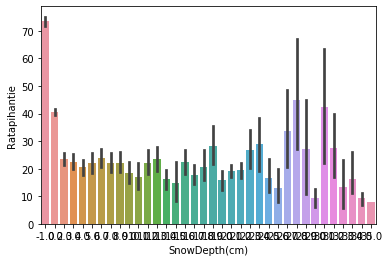

In [95]:
sns.barplot(x='SnowDepth(cm)', y='Ratapihantie', data=wholeset)

In [ ]:
#sns.pairplot(wholeset)

C:\Users\seppo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\seppo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


In [124]:
wholeset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 20 columns):
Date                             8760 non-null object
Time                             8760 non-null object
AirTemperature(degC)             8758 non-null float64
SnowDepth(cm)                    8699 non-null float64
WindSpeed(m/s)                   8557 non-null float64
WindDirection(deg)               8558 non-null float64
Weekday                          8760 non-null object
Huopalahti (station)             8760 non-null float64
Kaisaniemi/Elaintarhanlahti      8760 non-null float64
Kulosaari bridge south           8760 non-null float64
Kulosaaren silta po.             8760 non-null float64
Kuusisaarentie                   8760 non-null float64
Merikannontie                    8760 non-null float64
Munkkiniemi bridge south side    8760 non-null float64
Munkkiniemi bridge north side    8760 non-null float64
Heperia park/Ooppera             8760 non-null float64
Pitkasilta itapu

In [ ]:
testcyclists.info()

In [ ]:
temperatures.info()

In [152]:
#sns.pairplot(temperatures)


In [153]:
temperatures.describe()


,AirTemperature(degC),SnowDepth(cm),WindSpeed(m/s),WindDirection(deg)
count,8751.000000,8749.000000,8748.000000,8748.000000
mean,7.458553,3.454681,3.926760,200.890032
std,8.181393,9.487503,1.770454,97.507909
min,-20.200000,-1.000000,0.000000,0.000000
25%,1.600000,-1.000000,2.700000,118.000000
50%,6.300000,0.000000,3.800000,214.500000
75%,14.500000,0.000000,5.000000,282.000000
max,32.900000,46.000000,11.900000,360.000000


In [154]:
hkicyclists.tail()


NameError: name 'hkicyclists' is not defined